Sarah's exploration

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats


from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import PrecisionRecallDisplay, precision_recall_curve

import prepare
import model

from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import label_binarize
from sklearn.naive_bayes import GaussianNB

In [2]:
# acquire dataset
df = pd.read_csv('healthcare-dataset-stroke-data.csv')

In [3]:
# clean original dataset up to explore stage
df = prepare.prep_data(pd.read_csv('healthcare-dataset-stroke-data.csv'))
df.head(3)

,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_range
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,65-70
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,30.6,never smoked,1,60-65
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,75-80


In [5]:
#train.to_csv('stroke.csv')

In [6]:
# prepare data using script
#df = prepare.prep_data(df).drop(columns=['age_range'])

In [7]:
# split the dataset into train_validate and test
train_validate, test = train_test_split(df, test_size=.2, random_state=777)

In [8]:
# the second split of train and validate
train, validate = train_test_split(train_validate, test_size=.25, random_state=777)

In [9]:
# checking the shape of each dataset
train.shape, validate.shape, test.shape

((3064, 12), (1022, 12), (1022, 12))

What are the top indicators for stroke?

In [10]:
train.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_range
1989,Female,51.0,0,0,Yes,Private,Urban,145.22,31.4,Unknown,0,50-55
4128,Female,36.0,0,0,Yes,Private,Urban,99.72,22.3,smokes,0,35-40
1961,Female,53.0,0,0,Yes,Self-employed,Urban,84.85,24.7,never smoked,0,50-55
38,Male,58.0,0,0,No,Private,Rural,92.62,32.0,Unknown,1,55-60
3086,Female,6.0,0,0,No,children,Urban,107.40,17.7,Unknown,0,5-10


In [11]:
pd.crosstab(train['stroke'], train['ever_married'])

ever_married,No,Yes
stroke,,
0,1043,1874
1,21,126


<AxesSubplot:xlabel='ever_married', ylabel='stroke'>

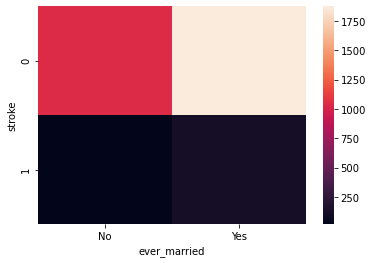

In [12]:
sns.heatmap(pd.crosstab(train['stroke'], train['ever_married']))

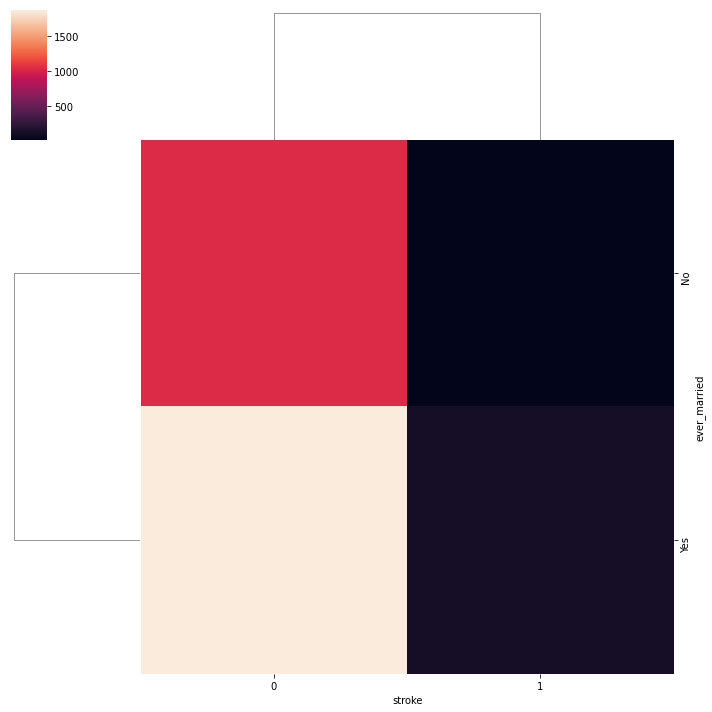

In [13]:
# here is a cluster map
sns.clustermap(pd.crosstab(train['ever_married'], train['stroke']))
plt.show()

In [14]:
train.corr()["stroke"]

age                  0.242398
avg_glucose_level    0.152192
bmi                  0.048770
stroke               1.000000
Name: stroke, dtype: float64

- age is most correlated with stroke followed by glucose and then bmi

/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


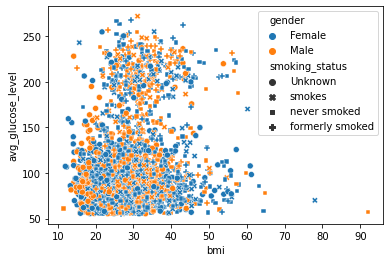

In [15]:
#Multivariate Analysis with 4 variabls
sns.scatterplot(train["bmi"], train["avg_glucose_level"], hue=train["gender"], style=train['smoking_status'])
plt.show()

/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


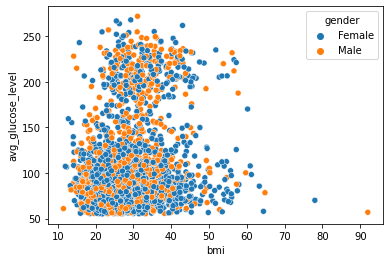

In [16]:
#Multivariate Analysis with 4 variabls
sns.scatterplot(train["bmi"], train["avg_glucose_level"], hue=train["gender"])
plt.show()

/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


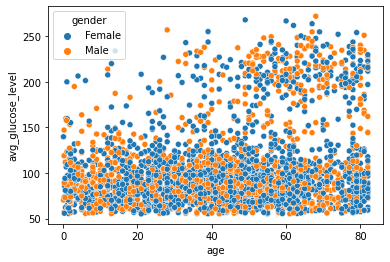

In [17]:
#Multivariate Analysis with 4 variabls
sns.scatterplot(train["age"], train["avg_glucose_level"], hue=train["gender"])
plt.show()

/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


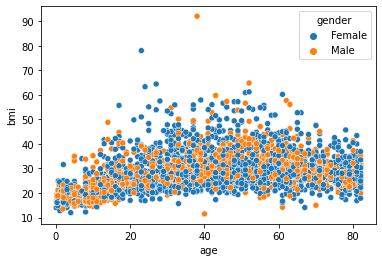

In [18]:
#Multivariate Analysis with 4 variabls
sns.scatterplot(train["age"], train["bmi"], hue=train["gender"])
plt.show()

/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


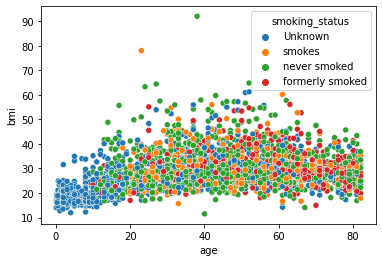

In [19]:
#Multivariate Analysis with 4 variabls
sns.scatterplot(train["age"], train["bmi"], hue=train["smoking_status"])
plt.show()

So now that we have a list of what variables are independent of each other we can attempt to answer some of the questions we posed
What are the top indicators of stroke?


In [20]:
# let's remove outliers in each columns

Let's move on to visualizing established independent variables to answer the top driver of stroke

p < .05 reject HO
H0: There is no relationship between gender and getting in trouble at school
H1: There is a relationship between gender and getting in trouble at school

p < .05 we reject that there is no relationship - DEPENDENT
age_range	gender
age_range	hypertension
age_range	heart_disease
age_range	ever_married


p > .05 so accept HO that there is not relationship so they are INDEPENDENT
gender	residence_type
gender	hypertension
gender	govt_job
gender	self_employed
gender	high_glucose
gender	current_smoker

This info comes from Jacob's exploration notebook

Possibly drivers in order to investigate:
'age_range', is a driver        42*
'heart_disease', is a driver    23*
'high_glucose', is a driver     16*
'ever_married', is a driver     11*
'hypertension', is a driver      9*
'never_worked', is a driver      6*
'prior_smoker', is a driver      5*
'bmi_range', is a driver         3*
'self_employed', is a driver     2*

             
Possibly not drivers in order to investigate:      
'gender', is not a driver         .67    
'govt_job' is not a driver        .40
'never_smoked', is not a driver   .17
'residence_type', is not a driver .14
'current_smoker', is not a driver .07
'private_work', is not a driver   .06


In [21]:
# feature splitting (employment types, glucose less/greater than 125, bmi 10 groups using pd.cut)
# work type
train['govt_job'] = train['work_type'] == 'Govt_job'
train['self_employed'] = train['work_type'] == 'Self-employed'
train['private_work'] = train['work_type'] == 'Private'
train['never_worked'] = (train['work_type'] == 'children') | (train['work_type'] == 'Never_worked')
# glucose
train['high_glucose'] = train['avg_glucose_level'] >= 125
# smoker
train['current_smoker'] = train['smoking_status'] == 'smokes'
train['prior_smoker'] = train['smoking_status'] == 'formerly smoked'
train['never_smoked'] = train['smoking_status'] == 'never smoked'
# bmi
bmi_bins = [0,10,20,30,40,50,60,70,80,90,100]
bmi_labels = ['0-9','10-19','20-29','30-39','40-49','50-59','60-69','70-79','80-89','90-99']
train['bmi_range'] = pd.cut(train.bmi, bins=bmi_bins, labels=bmi_labels)

# drop old columns
train.drop(columns=['work_type','avg_glucose_level','smoking_status','bmi'], inplace=True)
train.head(3)

<ipython-input-21-7c5360d269c4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['govt_job'] = train['work_type'] == 'Govt_job'
<ipython-input-21-7c5360d269c4>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['self_employed'] = train['work_type'] == 'Self-employed'
<ipython-input-21-7c5360d269c4>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pand

,gender,age,hypertension,heart_disease,ever_married,residence_type,stroke,age_range,govt_job,self_employed,private_work,never_worked,high_glucose,current_smoker,prior_smoker,never_smoked,bmi_range
1989,Female,51.0,0,0,Yes,Urban,0,50-55,False,False,True,False,True,False,False,False,30-39
4128,Female,36.0,0,0,Yes,Urban,0,35-40,False,False,True,False,False,True,False,False,20-29
1961,Female,53.0,0,0,Yes,Urban,0,50-55,False,True,False,False,False,False,False,True,20-29


In [22]:
pd.to_csv('train')

AttributeError: module 'pandas' has no attribute 'to_csv'

In [23]:
# clean original dataset up to explore stage
# df = prepare.prep_data(pd.read_csv('healthcare-dataset-stroke-data.csv'))
# df.head(3)

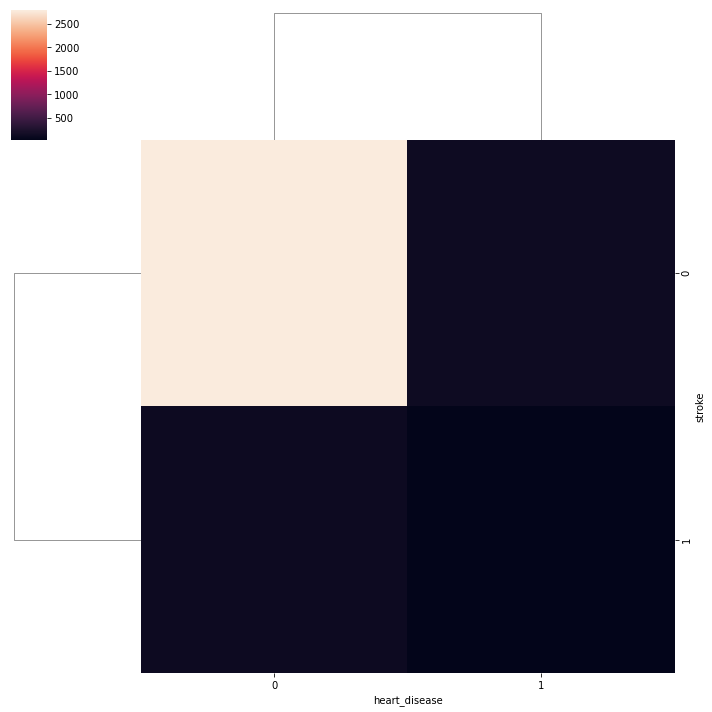

In [24]:
# So first let's look at stroke to each of the possible drivers
sns.clustermap(pd.crosstab(train['stroke'], train['heart_disease']))
plt.show()

<AxesSubplot:xlabel='heart_disease', ylabel='stroke'>

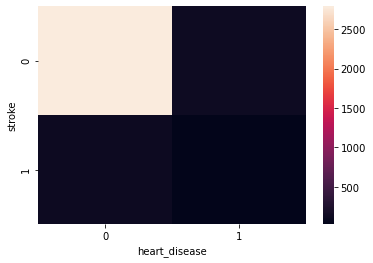

In [25]:
sns.heatmap(pd.crosstab(train['stroke'], train['heart_disease']))

<AxesSubplot:xlabel='age_range', ylabel='stroke'>

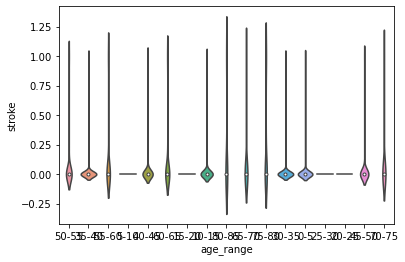

In [26]:
sns.violinplot(x=train["age_range"], y=train["stroke"])

<AxesSubplot:xlabel='age_range', ylabel='stroke'>

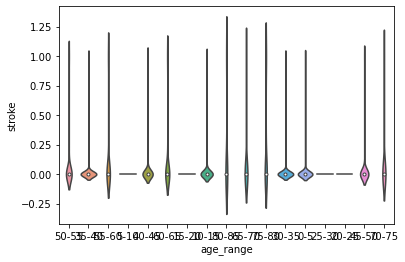

In [27]:
sns.violinplot(x=train["age_range"], y=train["stroke"])

In [28]:
# moved on to visualizing in Tableau from here

Tips for final notebook
1. Are we going to list after our initial hypothesis the ones we decided as a group were most interesting like current smoker v. prior smoker, bmi discover of unexpected risk as bmi increases, top indicators?
2. 


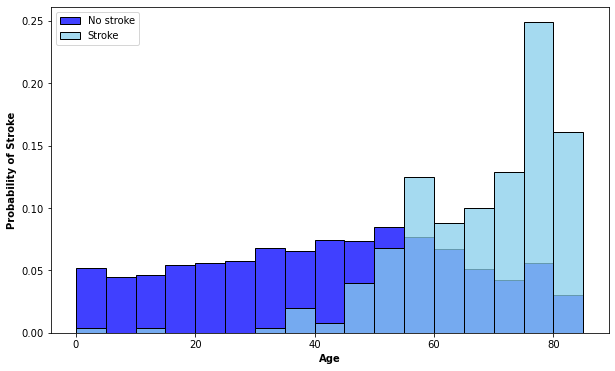

In [37]:
plt.figure(figsize=(10,6))
sns.histplot(
    df[df["stroke"] == 0]["age"], 
    binwidth=5, 
    binrange=[0, 85], 
    stat="probability", 
    color="blue", 
    label="No stroke",
)
sns.histplot(
    df[df["stroke"] == 1]["age"], 
    binwidth=5, 
    binrange=[0, 85], 
    stat="probability", 
    color="skyblue", 
    label="Stroke",
)
plt.xlabel("Age", fontweight="bold")
plt.ylabel("Probability of Stroke", fontweight="bold")
plt.legend()
plt.show()


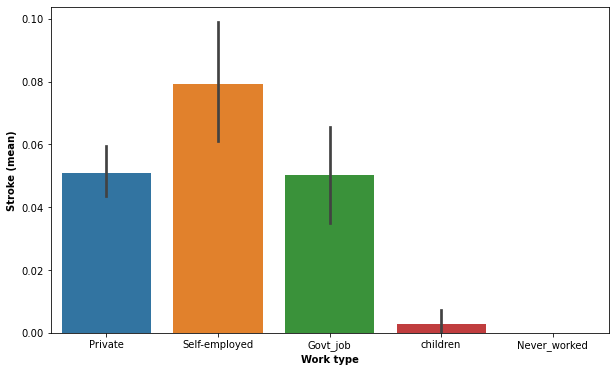

In [30]:
plt.figure(figsize=(10,6))
sns.barplot(x="work_type", y="stroke", data=df)
plt.xlabel("Work type", fontweight="bold")
plt.ylabel("Stroke (mean)", fontweight="bold")
plt.show()


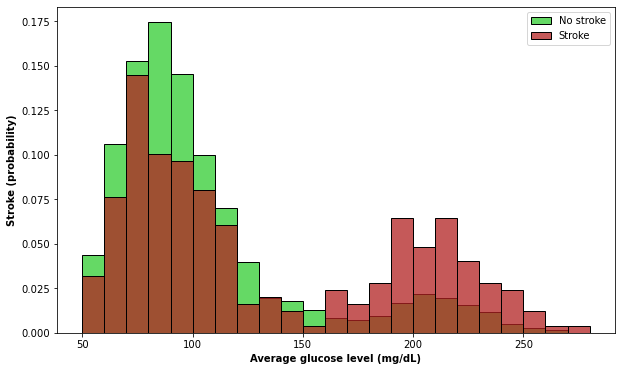

In [31]:
plt.figure(figsize=(10,6))
sns.histplot(
    df[df["stroke"] == 0]["avg_glucose_level"], 
    binwidth=10, 
    binrange=[50, 280], 
    stat="probability", 
    color="limegreen", 
    label="No stroke",
)
sns.histplot(
    df[df["stroke"] == 1]["avg_glucose_level"], 
    binwidth=10, 
    binrange=[50, 280], 
    stat="probability", 
    color="firebrick", 
    label="Stroke",
)
plt.xlabel("Average glucose level (mg/dL)", fontweight="bold")
plt.ylabel("Stroke (probability)", fontweight="bold")
plt.legend()
plt.show()